# ⚠️ Risk Measures: Value at Risk (VaR) and Expected Shortfall (ES)

These measures help quantify potential losses in portfolios.

---

## 🔻 Value at Risk (VaR)

**Definition**: VaR answers the question:
> "What is the maximum loss with a certain confidence level over a specific time period?"

### Formula (for normal distribution):
\[
VaR_\alpha = \mu_p + z_\alpha \cdot \sigma_p
\]

Where:
- \( \mu_p \): Portfolio mean return
- \( \sigma_p \): Portfolio standard deviation
- \( z_\alpha \): Z-score for confidence level (e.g., -1.65 for 95%)

VaR tells us: "There is a 95% chance the portfolio will not lose more than **X** over the next day/week/month."

---

## 💀 Expected Shortfall (ES) or Conditional VaR

**Definition**: The **average loss** given that the loss is **beyond the VaR threshold**.

More conservative than VaR.

For normal distribution:
\[
ES_\alpha = \mu_p - \frac{\sigma_p \cdot \phi(z_\alpha)}{1 - \alpha}
\]

Where:
- \( \phi(z) \): Standard normal PDF at \( z \)


VaR (95%): -0.0319
Expected Shortfall (95%): -0.0403


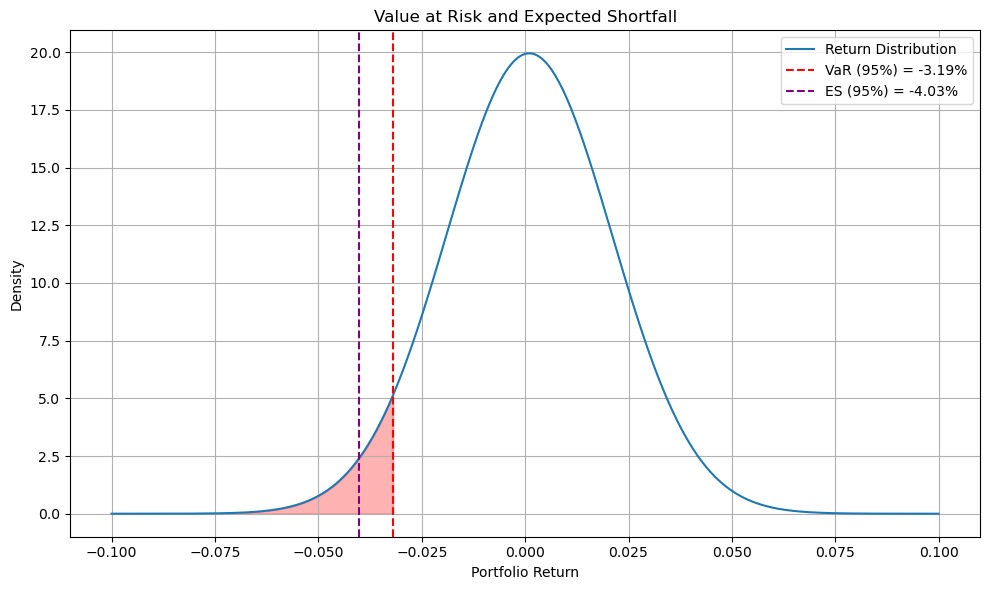

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulated portfolio return stats
mu_p = 0.001  # daily expected return (0.1%)
sigma_p = 0.02  # daily std dev (2%)
alpha = 0.95  # confidence level
z_alpha = norm.ppf(1 - alpha)  # VaR quantile (left tail)

# Value at Risk (VaR)
VaR = mu_p + z_alpha * sigma_p

# Expected Shortfall (ES)
pdf_z = norm.pdf(z_alpha)
ES = mu_p - (sigma_p * pdf_z) / (1 - alpha)

print(f"VaR (95%): {VaR:.4f}")
print(f"Expected Shortfall (95%): {ES:.4f}")

# Plotting the distribution
x = np.linspace(-0.1, 0.1, 1000)
y = norm.pdf(x, mu_p, sigma_p)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Return Distribution')
plt.axvline(VaR, color='red', linestyle='--', label=f'VaR (95%) = {VaR:.2%}')
plt.axvline(ES, color='purple', linestyle='--', label=f'ES (95%) = {ES:.2%}')
plt.fill_between(x, 0, y, where=(x < VaR), color='red', alpha=0.3)
plt.title('Value at Risk and Expected Shortfall')
plt.xlabel('Portfolio Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
